In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Note: Adjust the URL to a valid dataset since the original link may not be available
df = pd.read_csv("C:/Users/Fabio/Desktop/career_change_prediction_dataset.csv")

# Display the first few rows
print(df.head())

# Check the shape of the dataset
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')

# Get information about data types and missing values
print(df.info())

# Summary statistics for numerical columns
print(df.describe())

# Summary statistics for categorical columns
print(df.describe(include=['object']))

# Number of duplicate rows
duplicates = df.duplicated().sum()
print(f'There are {duplicates} duplicate rows.')

  Field of Study Current Occupation  Age  Gender  Years of Experience  \
0       Medicine   Business Analyst   48    Male                    7   
1      Education          Economist   44    Male                   26   
2      Education          Biologist   21  Female                   27   
3      Education   Business Analyst   33    Male                   14   
4           Arts             Doctor   28  Female                    0   

  Education Level Industry Growth Rate  Job Satisfaction  Work-Life Balance  \
0     High School                 High                 7                 10   
1        Master's                  Low                10                  3   
2        Master's                  Low                 8                  3   
3             PhD               Medium                 7                  9   
4             PhD                  Low                 3                  1   

   Job Opportunities  ...  Skills Gap  Family Influence  Mentorship Available  \
0    

In [2]:
# Total missing values per column
print(df.isnull().sum())

Field of Study                    0
Current Occupation                0
Age                               0
Gender                            0
Years of Experience               0
Education Level                   0
Industry Growth Rate              0
Job Satisfaction                  0
Work-Life Balance                 0
Job Opportunities                 0
Salary                            0
Job Security                      0
Career Change Interest            0
Skills Gap                        0
Family Influence               9632
Mentorship Available              0
Certifications                    0
Freelancing Experience            0
Geographic Mobility               0
Professional Networks             0
Career Change Events              0
Technology Adoption               0
Likely to Change Occupation       0
dtype: int64


In [3]:
df['Education Level'].unique()

array(['High School', "Master's", 'PhD', "Bachelor's"], dtype=object)

In [4]:
mapping = {'High School': 1, 'PhD': 4, "Master's": 3, "Bachelor's": 2}

df['Education Level'] = df['Education Level'].map(mapping)

In [5]:
df['Education Level'].unique()

array([1, 3, 4, 2], dtype=int64)

In [6]:
df['Industry Growth Rate'].unique()

array(['High', 'Low', 'Medium'], dtype=object)

In [7]:
mapping = {'High': 3, 'Low': 1, "Medium": 2}

df['Industry Growth Rate'] = df['Industry Growth Rate'].map(mapping)

In [8]:
df['Industry Growth Rate'].unique() 

array([3, 1, 2], dtype=int64)

In [9]:
df['Family Influence'].unique()

array(['High', 'Medium', 'Low', nan], dtype=object)

In [10]:
mapping = {'High': 3, 'Low': 1, "Medium": 2}

df['Family Influence'] = df['Family Influence'].map(mapping)

df['Family Influence'] = df['Family Influence'].fillna(0).astype(int)

In [11]:
df['Family Influence'].unique()

array([3, 2, 1, 0])

In [12]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [13]:
mapping = {'Male': 2, 'Female': 1}

df['Gender'] = df['Gender'].map(mapping)

In [14]:
df['Gender'].unique()

array([2, 1], dtype=int64)

In [15]:
df.dtypes

Field of Study                 object
Current Occupation             object
Age                             int64
Gender                          int64
Years of Experience             int64
Education Level                 int64
Industry Growth Rate            int64
Job Satisfaction                int64
Work-Life Balance               int64
Job Opportunities               int64
Salary                          int64
Job Security                    int64
Career Change Interest          int64
Skills Gap                      int64
Family Influence                int32
Mentorship Available            int64
Certifications                  int64
Freelancing Experience          int64
Geographic Mobility             int64
Professional Networks           int64
Career Change Events            int64
Technology Adoption             int64
Likely to Change Occupation     int64
dtype: object

In [16]:
# Selezionare tutte le colonne tranne 'Field of Study' e 'Current Occupation'
filtered_columns = df.columns.difference(['Field of Study', 'Current Occupation'])

# Creare il DataFrame con le colonne filtrate
filtered_df = df.loc[:, filtered_columns]

filtered_df.columns = filtered_df.columns.str.replace(' ', '_')
filtered_df.columns = filtered_df.columns.str.replace('-', '_')

print(filtered_df.dtypes)

independent_vars = " + ".join(col for col in filtered_df.columns if col not in  ['Likely_to_Change_Occupation'])

Age                            int64
Career_Change_Events           int64
Career_Change_Interest         int64
Certifications                 int64
Education_Level                int64
Family_Influence               int32
Freelancing_Experience         int64
Gender                         int64
Geographic_Mobility            int64
Industry_Growth_Rate           int64
Job_Opportunities              int64
Job_Satisfaction               int64
Job_Security                   int64
Likely_to_Change_Occupation    int64
Mentorship_Available           int64
Professional_Networks          int64
Salary                         int64
Skills_Gap                     int64
Technology_Adoption            int64
Work_Life_Balance              int64
Years_of_Experience            int64
dtype: object


         Current function value: 0.227268
         Iterations: 35
                                Logit Regression Results                               
Dep. Variable:     Likely_to_Change_Occupation   No. Observations:                38444
Model:                                   Logit   Df Residuals:                    38423
Method:                                    MLE   Df Model:                           20
Date:                         Thu, 21 Nov 2024   Pseudo R-squ.:                  0.6665
Time:                                 17:12:50   Log-Likelihood:                -8737.1
converged:                               False   LL-Null:                       -26195.
Covariance Type:                     nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  8.8645      0.187    

c:\Users\Fabio\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Number of influential points: 3110


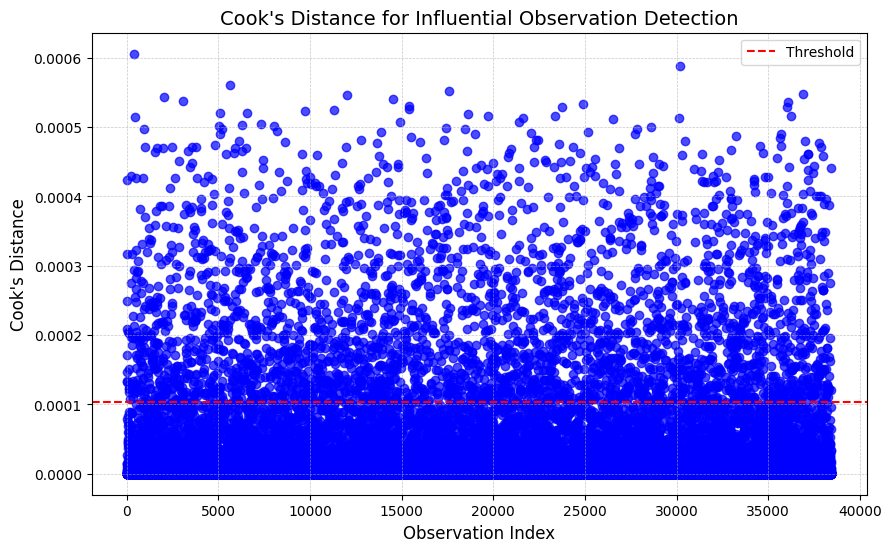

In [17]:
import statsmodels.formula.api as smf

# Fit the logistic regression model
# Definire il modello logit
formula = f"Likely_to_Change_Occupation ~ {independent_vars}"
model = smf.logit(formula, data=filtered_df).fit()
print(model.summary())

import numpy as np

# Get influence measures
influence = model.get_influence()

# Extract Cook's distance
cooks_d = influence.cooks_distance[0]

n = len(df)
threshold = 4 / n
influential_points = np.where(cooks_d > threshold)[0]

print(f"Number of influential points: {len(influential_points)}")

import matplotlib.pyplot as plt

# Assuming 'model' is your fitted logistic regression model
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

# Importiamo matplotlib
import matplotlib.pyplot as plt

# Creazione del grafico di Cook's Distance
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(cooks_d)), cooks_d, color='blue', alpha=0.7)
plt.xlabel('Observation Index', fontsize=12)
plt.ylabel("Cook's Distance", fontsize=12)
plt.title("Cook's Distance for Influential Observation Detection", fontsize=14)

# Threshold line
n = len(df)
threshold = 4 / n
plt.axhline(y=threshold, color='red', linestyle='--', linewidth=1.5, label='Threshold')

plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()


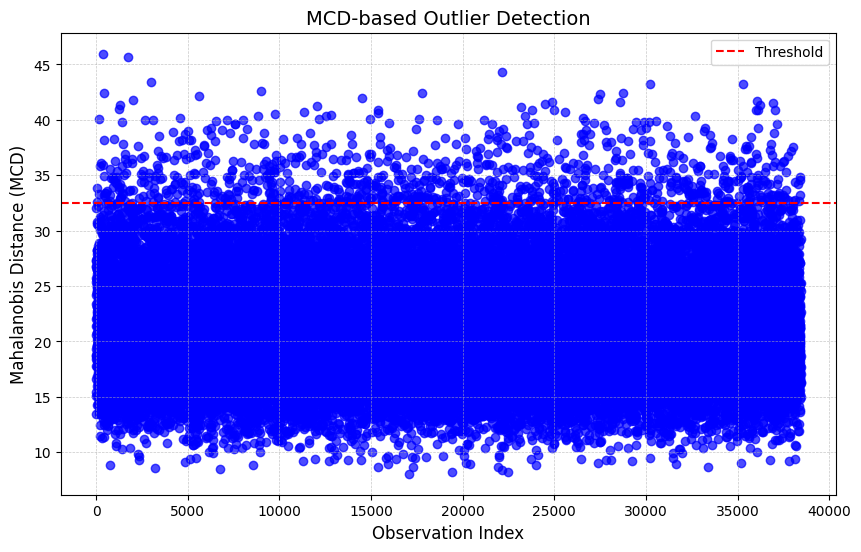

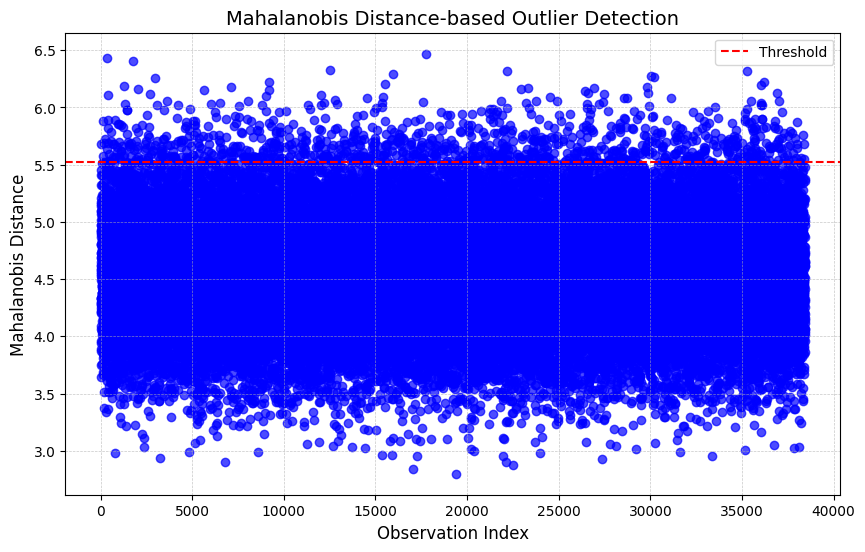

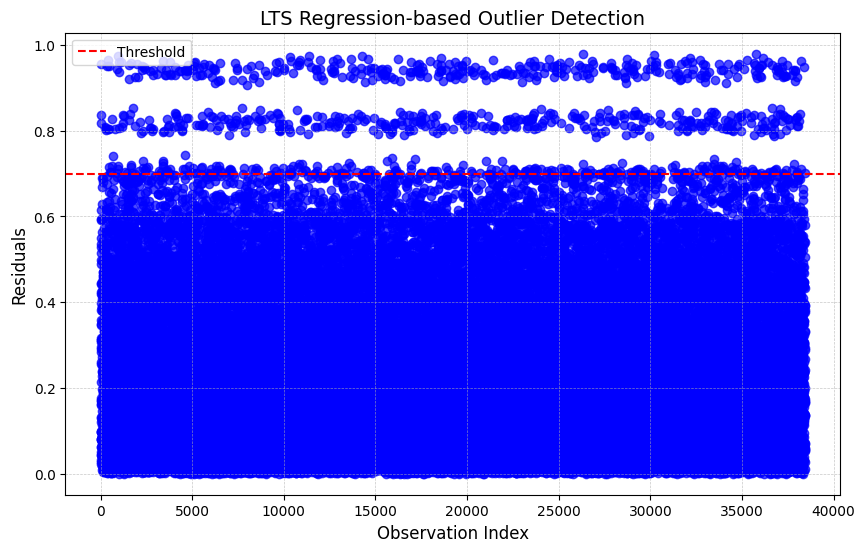

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.covariance import MinCovDet
from scipy.spatial.distance import mahalanobis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Metodo 1: Minimum Covariance Determinant (MCD) per rilevare outlier
mcd = MinCovDet().fit(filtered_df)
mcd_mahalanobis = mcd.mahalanobis(filtered_df)
threshold_mcd = np.percentile(mcd_mahalanobis, 97.5)
outliers_mcd = np.where(mcd_mahalanobis > threshold_mcd)

plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(mcd_mahalanobis)), mcd_mahalanobis, color='blue', alpha=0.7)
plt.axhline(y=threshold_mcd, color='red', linestyle='--', linewidth=1.5, label='Threshold')
plt.xlabel('Observation Index', fontsize=12)
plt.ylabel('Mahalanobis Distance (MCD)', fontsize=12)
plt.title('MCD-based Outlier Detection', fontsize=14)
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

# Metodo 2: Distanza di Mahalanobis per rilevare outlier
mean = filtered_df.mean().values
cov_matrix = np.cov(filtered_df, rowvar=False)
inverse_cov_matrix = np.linalg.inv(cov_matrix)
mahalanobis_distances = [mahalanobis(row, mean, inverse_cov_matrix) for row in filtered_df.values]
threshold_mahalanobis = np.percentile(mahalanobis_distances, 97.5)
outliers_mahalanobis = np.where(mahalanobis_distances > threshold_mahalanobis)

plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(mahalanobis_distances)), mahalanobis_distances, color='blue', alpha=0.7)
plt.axhline(y=threshold_mahalanobis, color='red', linestyle='--', linewidth=1.5, label='Threshold')
plt.xlabel('Observation Index', fontsize=12)
plt.ylabel('Mahalanobis Distance', fontsize=12)
plt.title('Mahalanobis Distance-based Outlier Detection', fontsize=14)
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

# Metodo 3: Least Trimmed Squares (LTS) per rilevare outlier
class LTSRegression:
    def __init__(self, trimming_proportion=0.25):
        self.trimming_proportion = trimming_proportion
        self.model = LinearRegression()

    def fit(self, X, y):
        n_trim = int(len(y) * self.trimming_proportion)
        self.model.fit(X, y)
        residuals = np.abs(y - self.model.predict(X))
        trimmed_indices = np.argsort(residuals)[:-n_trim]
        self.model.fit(X[trimmed_indices], y[trimmed_indices])
        return self

    def predict(self, X):
        return self.model.predict(X)

X = filtered_df.drop(columns=['Likely_to_Change_Occupation']).values  
y = filtered_df['Likely_to_Change_Occupation'].values  

lts = LTSRegression().fit(X, y)
y_pred = lts.predict(X)
residuals = np.abs(y - y_pred)
threshold_lts = np.percentile(residuals, 97.5)
outliers_lts = np.where(residuals > threshold_lts)

plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(residuals)), residuals, color='blue', alpha=0.7)
plt.axhline(y=threshold_lts, color='red', linestyle='--', linewidth=1.5, label='Threshold')
plt.xlabel('Observation Index', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('LTS Regression-based Outlier Detection', fontsize=14)
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

In [19]:
# Importiamo plotly e altre librerie necessarie
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from sklearn.covariance import MinCovDet
from scipy.spatial.distance import mahalanobis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Creazione del grafico di Cook's Distance
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(cooks_d)), y=cooks_d, mode='markers', marker=dict(color='blue', opacity=0.7), name="Cook's Distance"))

# Threshold line
n = len(filtered_df)
threshold = 4 / n
fig.add_trace(go.Scatter(x=[0, len(cooks_d)], y=[threshold, threshold], mode='lines', line=dict(color='red', dash='dash'), name='Threshold'))

fig.update_layout(
    title="Cook's Distance for Influential Observation Detection",
    xaxis_title='Observation Index',
    yaxis_title="Cook's Distance",
    legend=dict(x=0.85, y=1),
    template='plotly_white'
)
fig.show()

# Metodo 1: Minimum Covariance Determinant (MCD) per rilevare outlier
mcd = MinCovDet().fit(filtered_df)
mcd_mahalanobis = mcd.mahalanobis(filtered_df)
threshold_mcd = np.percentile(mcd_mahalanobis, 97.5)
outliers_mcd = np.where(mcd_mahalanobis > threshold_mcd)

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(mcd_mahalanobis)), y=mcd_mahalanobis, mode='markers', marker=dict(color='blue', opacity=0.7), name='Mahalanobis Distance (MCD)'))
fig.add_trace(go.Scatter(x=[0, len(mcd_mahalanobis)], y=[threshold_mcd, threshold_mcd], mode='lines', line=dict(color='red', dash='dash'), name='Threshold'))

fig.update_layout(
    title='MCD-based Outlier Detection',
    xaxis_title='Observation Index',
    yaxis_title='Mahalanobis Distance (MCD)',
    legend=dict(x=0.85, y=1),
    template='plotly_white'
)
fig.show()

# Metodo 2: Distanza di Mahalanobis per rilevare outlier
mean = filtered_df.mean().values
cov_matrix = np.cov(filtered_df, rowvar=False)
inverse_cov_matrix = np.linalg.inv(cov_matrix)
mahalanobis_distances = [mahalanobis(row, mean, inverse_cov_matrix) for row in filtered_df.values]
threshold_mahalanobis = np.percentile(mahalanobis_distances, 97.5)
outliers_mahalanobis = np.where(mahalanobis_distances > threshold_mahalanobis)

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(mahalanobis_distances)), y=mahalanobis_distances, mode='markers', marker=dict(color='blue', opacity=0.7), name='Mahalanobis Distance'))
fig.add_trace(go.Scatter(x=[0, len(mahalanobis_distances)], y=[threshold_mahalanobis, threshold_mahalanobis], mode='lines', line=dict(color='red', dash='dash'), name='Threshold'))

fig.update_layout(
    title='Mahalanobis Distance-based Outlier Detection',
    xaxis_title='Observation Index',
    yaxis_title='Mahalanobis Distance',
    legend=dict(x=0.85, y=1),
    template='plotly_white'
)
fig.show()

# Metodo 3: Least Trimmed Squares (LTS) per rilevare outlier
class LTSRegression:
    def __init__(self, trimming_proportion=0.25):
        self.trimming_proportion = trimming_proportion
        self.model = LinearRegression()

    def fit(self, X, y):
        n_trim = int(len(y) * self.trimming_proportion)
        self.model.fit(X, y)
        residuals = np.abs(y - self.model.predict(X))
        trimmed_indices = np.argsort(residuals)[:-n_trim]
        self.model.fit(X[trimmed_indices], y[trimmed_indices])
        return self

    def predict(self, X):
        return self.model.predict(X)

X = filtered_df.drop(columns=['Likely_to_Change_Occupation']).values  # Sostituire 'target_column' con il nome della colonna target
y = filtered_df['Likely_to_Change_Occupation'].values  # Sostituire 'target_column' con il nome della colonna target

lts = LTSRegression().fit(X, y)
y_pred = lts.predict(X)
residuals = np.abs(y - y_pred)
threshold_lts = np.percentile(residuals, 97.5)
outliers_lts = np.where(residuals > threshold_lts)

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(residuals)), y=residuals, mode='markers', marker=dict(color='blue', opacity=0.7), name='Residuals'))
fig.add_trace(go.Scatter(x=[0, len(residuals)], y=[threshold_lts, threshold_lts], mode='lines', line=dict(color='red', dash='dash'), name='Threshold'))

fig.update_layout(
    title='LTS Regression-based Outlier Detection',
    xaxis_title='Observation Index',
    yaxis_title='Residuals',
    legend=dict(x=0.85, y=1),
    template='plotly_white'
)
fig.show()


In [20]:
# Remove influential observations
filtered_df_cleaned = filtered_df.drop(index=filtered_df.index[influential_points])

# Check the shape of the dataset after removal
print(f"Dataset size before removal: {filtered_df.shape}")
print(f"Dataset size after removal: {filtered_df_cleaned.shape}")

import statsmodels.formula.api as smf

# Fit the logistic regression model on the cleaned data
formula = f"Likely_to_Change_Occupation ~ {independent_vars}"
model_cleaned = smf.logit(formula, data=filtered_df).fit()

# Display the summary
print(model_cleaned.summary())

Dataset size before removal: (38444, 21)
Dataset size after removal: (35334, 21)
         Current function value: 0.227268
         Iterations: 35
                                Logit Regression Results                               
Dep. Variable:     Likely_to_Change_Occupation   No. Observations:                38444
Model:                                   Logit   Df Residuals:                    38423
Method:                                    MLE   Df Model:                           20
Date:                         Thu, 21 Nov 2024   Pseudo R-squ.:                  0.6665
Time:                                 17:13:18   Log-Likelihood:                -8737.1
converged:                               False   LL-Null:                       -26195.
Covariance Type:                     nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------

c:\Users\Fabio\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [21]:
from sklearn.metrics import accuracy_score

# Predict outcomes (probabilities > 0.5)
y_pred_original = (model.predict(filtered_df) > 0.5).astype(int)
y_pred_cleaned = (model_cleaned.predict(filtered_df_cleaned) > 0.5).astype(int)

# Calculate accuracy
print("Accuracy (original model):", accuracy_score(filtered_df['Likely_to_Change_Occupation'], y_pred_original))
print("Accuracy (cleaned model):", accuracy_score(filtered_df_cleaned['Likely_to_Change_Occupation'], y_pred_cleaned))


Accuracy (original model): 0.90073873686401
Accuracy (cleaned model): 0.9793400124525953


In [22]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix (original model):")
print(confusion_matrix(filtered_df['Likely_to_Change_Occupation'], y_pred_original))

print("\nConfusion Matrix (cleaned model):")
print(confusion_matrix(filtered_df_cleaned['Likely_to_Change_Occupation'], y_pred_cleaned))


Confusion Matrix (original model):
[[14400  1879]
 [ 1937 20228]]

Confusion Matrix (cleaned model):
[[14395   452]
 [  278 20209]]


In [23]:
from sklearn.metrics import roc_auc_score

# Calculate AUC
print("ROC-AUC (original model):", roc_auc_score(filtered_df['Likely_to_Change_Occupation'], model.predict(filtered_df)))
print("ROC-AUC (cleaned model):", roc_auc_score(filtered_df_cleaned['Likely_to_Change_Occupation'], model_cleaned.predict(filtered_df_cleaned)))


ROC-AUC (original model): 0.967478979054153
ROC-AUC (cleaned model): 0.998950910717706


In [24]:
import statsmodels.formula.api as smf

# Fit a robust logistic regression model with L1 regularization
formula = f"Likely_to_Change_Occupation ~ {independent_vars}"
robust_model = smf.logit(formula, data=filtered_df).fit_regularized(method='l1', alpha=0.01)
# Display the summary
print(robust_model.summary())


c:\Users\Fabio\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning:

overflow encountered in exp

c:\Users\Fabio\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning:

divide by zero encountered in log



Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.22730540037641264
            Iterations: 78
            Function evaluations: 94
            Gradient evaluations: 78
                                Logit Regression Results                               
Dep. Variable:     Likely_to_Change_Occupation   No. Observations:                38444
Model:                                   Logit   Df Residuals:                    38423
Method:                                    MLE   Df Model:                           20
Date:                         Thu, 21 Nov 2024   Pseudo R-squ.:                  0.6665
Time:                                 17:13:20   Log-Likelihood:                -8737.1
converged:                                True   LL-Null:                       -26195.
Covariance Type:                     nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0

c:\Users\Fabio\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning:

QC check did not pass for 19 out of 21 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers

c:\Users\Fabio\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning:

Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.



In [25]:
from sklearn.metrics import accuracy_score

# Predict outcomes (probabilities > 0.5)
y_pred_robust = (robust_model.predict(filtered_df) > 0.5).astype(int)

# Calculate accuracy
print("Accuracy (Original model):", accuracy_score(filtered_df['Likely_to_Change_Occupation'], y_pred_original))
print("Accuracy (Robust model):", accuracy_score(filtered_df['Likely_to_Change_Occupation'], y_pred_robust))


Accuracy (Original model): 0.90073873686401
Accuracy (Robust model): 0.90073873686401


In [26]:
from sklearn.metrics import roc_auc_score

# Predict probabilities
non_robust_probs = model.predict(filtered_df)
robust_probs = robust_model.predict(filtered_df)

# Calculate ROC-AUC
roc_auc_non_robust = roc_auc_score(filtered_df['Likely_to_Change_Occupation'], non_robust_probs)
roc_auc_robust = roc_auc_score(filtered_df['Likely_to_Change_Occupation'], robust_probs)

print(f"ROC-AUC (Non-Robust): {roc_auc_non_robust}")
print(f"ROC-AUC (Robust): {roc_auc_robust}")


ROC-AUC (Non-Robust): 0.967478979054153
ROC-AUC (Robust): 0.9674790649686074
